In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

Using TensorFlow backend.
/home/bhaven/anaconda3/envs/Project/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bhaven/anaconda3/envs/Project/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bhaven/anaconda3/envs/Project/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bhaven/anac

In [2]:
# architecture and weights from HDF5
model = load_model('/home/bhaven/Desktop/model/diabetic.h5')

# architecture from JSON, weights from HDF5
with open('/home/bhaven/Desktop/model/architecture.json') as f:
    model = model_from_json(f.read())
model.load_weights('/home/bhaven/Desktop/model/weights.h5')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
validation_img_paths = ["/home/bhaven/Desktop/img/69_right.jpeg",
                        "/home/bhaven/Desktop/img/69_left.jpeg",
                        "/home/bhaven/Desktop/img/200_right.jpeg",
                        "/home/bhaven/Desktop/img/200_left.jpeg"]
img_list = [Image.open(img_path) for img_path in validation_img_paths]

In [12]:
validation_batch = np.stack([preprocess_input(np.array(img.resize((224,224)))) for img in img_list])

In [13]:
pred_probs = model.predict(validation_batch)

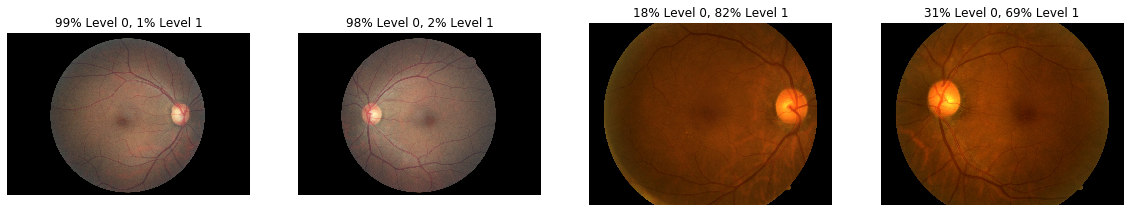

In [14]:
fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% Level 0, {:.0f}% Level 1".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1]))
    ax.imshow(img)